# Regresión lineal simple

### La regresión lineal es un método de aprendizaje estadístico útil para predecir una respuesta cuantitativa

Otros métodos más sofisticados son generalizaciones o extensiones de la regresión lineal

Dentro de la estadística, el aprendizaje estadístico se enfoca en predecir y modelar de manera 'supervisada' y 'no supervisada'
* 'Supervisada' --> Para cada medición del predictor (X), existe una respuesta asociada (Y)
* 'No supervisada' --> Para cada medición del predictor (X), no existe una respuesta asociada (Y)


### La regresión lineal simple consiste en predecir una respuesta cuantitativa Y con base en una sola variable predictora X

Matemáticamente, esta relación considera:
* Y ≈ β0 + β1X

El símbolo “≈” se lee como “es aproximadamente modelada como”.

β0 y β1 son dos constantes que representan el intercepto y la pendiente. En conjunto, se les conoce como los coeficientes o parámetros del modelo. 
* Intercepto: Coordenada Y, donde la variable X=0
* Pendiente: El cambio en Y dividido por el cambio en X

Para expresar la función y los coeficientes estimados, se usa el símbolo "hat" --> ˆ

### ¿Qué variables de la base de datos de antropometría nos pueden ayudar a predecir la variable 'cintura'?

In [223]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

# %matplotlib inline is an example of a predefined magic function in Python. They are frequently used
# in interactive environments like jupyter notebook.
# %matplotlib inline makes your plot outputs appear and be stored within the notebook.
%matplotlib inline

#Pyplot is a collection of functions in the popular visualization package Matplotlib
import matplotlib.pyplot as plt

#máximo número de columnas (o renglones: display.max_rows)
pd.set_option('display.max_columns', 100)

import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [224]:
ubicacion = "antropometria-dataset.csv"
medidas = pd.read_csv(ubicacion)

In [225]:
#desplegar los primeros datos del 'dataframe' para revisar qué variables y qué tipo de datos hay
#tail
medidas.head(100)

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,emb,temb,cintura,cadera,sistol,diastol,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.700,2,146.40,4,,98.70,106.00,63.25,53.25,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.650,2,145.10,,,64.00,75.00,70.00,50.00,15:25,3,15:25,1,M1041,1,1,1,417.946672,101
2,10287,6,1,AGUASCALIENTES,2,18,8,54.800,1,162.00,4,,67.60,94.30,70.50,41.00,9:40,1,9:40,1,M0108,5,3,1,472.980811,15
3,91526,4,9,DISTRITO FEDERAL,1,10,8,33.400,2,146.50,,,60.60,72.20,71.00,64.00,7:40,3,7:45,1,M0931,4,3,2,1832.581391,94
4,210939,3,21,PUEBLA,2,19,3,97.950,2,161.00,4,,113.00,127.00,72.00,53.50,6:00,2,6:00,1,M2123,5,3,1,7622.066564,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,91148,2,9,DISTRITO FEDERAL,2,43,1,60.500,1,148.55,4,,80.00,95.95,84.75,56.00,9:34,1,9:42,1,R0910,4,3,2,2552.981391,94
96,20309,1,2,BAJA CALIFORNIA,2,26,10,47.325,1,151.00,4,,73.00,87.00,85.00,60.00,19:30,3,19:30,1,R0202,4,2,2,420.792175,24
97,21863,3,2,BAJA CALIFORNIA,2,19,3,49.725,1,152.50,4,,75.00,90.00,85.00,75.00,17:45,3,17:45,1,R0217,6,3,2,509.560021,26
98,70225,3,7,CHIAPAS,1,11,5,30.325,1,133.10,,,61.35,68.55,85.00,60.00,15:20,3,15:20,1,M0705,1,1,1,931.311677,71


In [226]:
#listar las variables
list(medidas.columns)

['folio',
 'intp',
 'entidad',
 'desc_ent',
 'sexo',
 'edad',
 'meses',
 'peso',
 'ropa',
 'talla',
 'emb',
 'temb',
 'cintura',
 'cadera',
 'sistol',
 'diastol',
 'hpresion',
 'tbrazo',
 'htension',
 'PrimaryLast',
 'code_upm',
 'est_dis',
 'est_urb',
 'est_marg',
 'pondef',
 'est_var']

In [227]:
#listar las variables y sus tipos
medidas.dtypes

folio            int64
intp             int64
entidad          int64
desc_ent        object
sexo             int64
edad             int64
meses            int64
peso           float64
ropa             int64
talla          float64
emb             object
temb            object
cintura        float64
cadera         float64
sistol         float64
diastol        float64
hpresion        object
tbrazo          object
htension        object
PrimaryLast      int64
code_upm        object
est_dis          int64
est_urb          int64
est_marg         int64
pondef         float64
est_var          int64
dtype: object

In [228]:
estado = medidas.groupby('entidad')['cintura'].mean()
#estado = medidas.groupby('desc_ent')['cintura'].mean()
#estado = medidas.groupby('desc_ent')['cintura'].median()
print(estado)

entidad
1     88.149370
2     89.471654
3     91.118965
4     88.981898
5     89.836213
6     89.892869
7     82.999191
8     89.816287
9     90.756452
10    89.202460
11    87.549565
12    85.051809
13    84.775632
14    88.898410
15    85.409663
16    88.731404
17    88.672978
18    86.833239
19    89.627504
20    84.104386
21    84.904149
22    86.921529
23    88.417425
24    85.068252
25    88.502231
26    88.577966
27    88.054373
28    90.423914
29    86.258514
30    86.698646
31    88.392504
32    87.583362
Name: cintura, dtype: float64


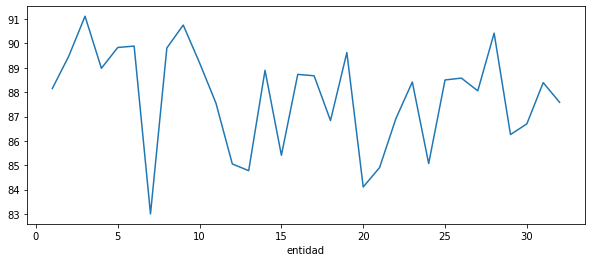

In [229]:
estado.plot(kind='line', figsize=(10,4))
#estado.plot(kind='bar', figsize=(10,4))

plt.show()

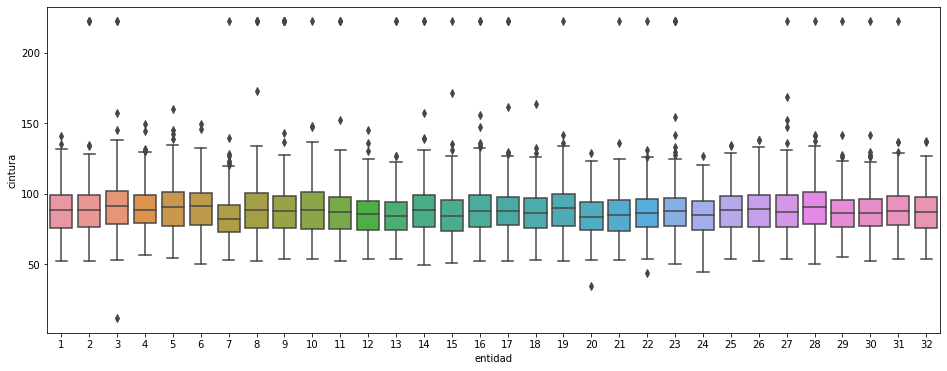

In [230]:
plt.figure(figsize=(16, 6))
sns.boxplot(x= 'entidad', y='cintura', data=medidas)
plt.show()

In [231]:
género = medidas.groupby('sexo')['cintura'].mean()
print(género)

sexo
1    87.502601
2    88.006300
Name: cintura, dtype: float64


<AxesSubplot:xlabel='sexo', ylabel='cintura'>

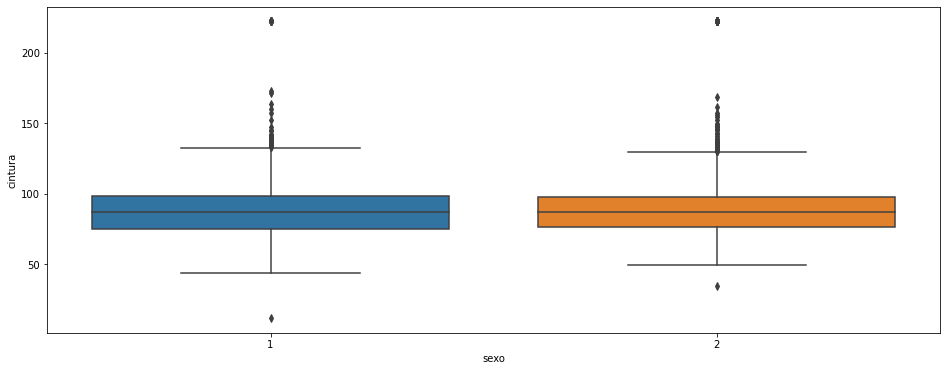

In [232]:
plt.figure(figsize=(16, 6))
sns.boxplot(x= 'sexo', y='cintura', data=medidas)

In [233]:
#entidad y sexo
estado_género = medidas.groupby(['entidad','sexo'])['cintura'].mean()
print(estado_género)

entidad  sexo
1        1       88.349338
         2       87.968018
2        1       90.115303
         2       88.864786
3        1       92.337778
                   ...    
30       2       87.174520
31       1       88.126653
         2       88.595457
32       1       87.045247
         2       88.034076
Name: cintura, Length: 64, dtype: float64


In [234]:
peso = medidas['peso']
talla = medidas['talla']
cintura = medidas['cintura']

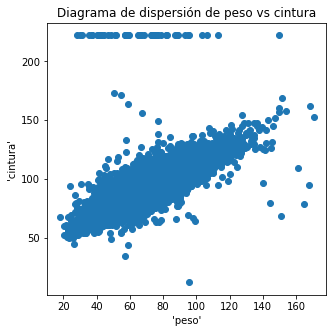

In [235]:
plt.figure(figsize=(5,5))
plt.scatter(x = peso, y = cintura)
plt.xlabel("'peso'")
plt.ylabel("'cintura'")
plt.title("Diagrama de dispersión de peso vs cintura")

plt.show()

In [236]:
#calcular correlación [-1 a 1]
correlación_cinturapeso = cintura.corr(peso)
print(correlación_cinturapeso)

0.7916768697606905


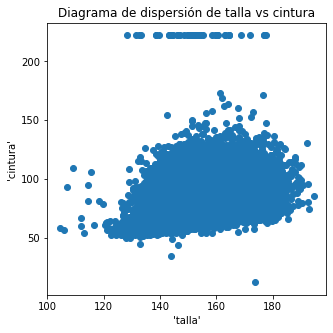

In [237]:
plt.figure(figsize=(5,5))
plt.scatter(x = talla, y = cintura)
plt.xlabel("'talla'")
plt.ylabel("'cintura'")
plt.title("Diagrama de dispersión de talla vs cintura")

plt.show()

In [238]:
#calcular correlación
correlación_cinturatalla = cintura.corr(talla)
print(correlación_cinturatalla)

0.2452078367252199


In [239]:
#¿Cuántos datos faltantes hay?
medidas.isna().sum()

folio            0
intp             0
entidad          0
desc_ent         0
sexo             0
edad             0
meses            0
peso             0
ropa             0
talla            0
emb              0
temb             0
cintura        608
cadera         608
sistol           0
diastol          0
hpresion         0
tbrazo           0
htension         0
PrimaryLast      0
code_upm         0
est_dis          0
est_urb          0
est_marg         0
pondef           0
est_var          0
dtype: int64

In [240]:
#Adicionalmente, ¿cuántos medidas faltantes hay?
medidas.loc[medidas.cintura == 222.2, 'cintura'].count()

17

In [241]:
#Eliminar los datos faltantes
medidascompletas = medidas.dropna()
medidascompletas.count()

folio          18032
intp           18032
entidad        18032
desc_ent       18032
sexo           18032
edad           18032
meses          18032
peso           18032
ropa           18032
talla          18032
emb            18032
temb           18032
cintura        18032
cadera         18032
sistol         18032
diastol        18032
hpresion       18032
tbrazo         18032
htension       18032
PrimaryLast    18032
code_upm       18032
est_dis        18032
est_urb        18032
est_marg       18032
pondef         18032
est_var        18032
dtype: int64

In [242]:
#Eliminación de valores atípicos
medidascompletas2 = medidascompletas[medidascompletas['cintura'] != 222.2]
medidascompletas2 = medidascompletas2[medidascompletas2['cintura'] != 222.21]
medidascompletas2 = medidascompletas2[medidascompletas2['cintura'] != 222.22]
#medidascompletas2.count()

#Validación, ¿cuántos medidas faltantes hay?
medidascompletas2.loc[medidascompletas2.cintura == 222.22, 'cintura'].count()

0

In [243]:
peso = medidascompletas2['peso']
talla = medidascompletas2['talla']
cintura = medidascompletas2['cintura']
print(talla.count(),peso.count())

17985 17985


In [244]:
correlación_cinturapeso = cintura.corr(peso)
correlación_cinturatalla = cintura.corr(talla)
print(correlación_cinturapeso, correlación_cinturatalla)

0.8661113096674505 0.2774161344265726


In [311]:
#Regresión lineal - Alternativa 1 para peso
y = cintura
x = peso

#Agrega una constante = 1 que es el multiplicador del intercepto (True - al inicio)
constant = sm.tools.tools.add_constant(x,prepend=True,has_constant='skip')

results = sm.OLS(y,constant).fit()

print(results.summary())

# Palomita en R-Squared = 1
# 2 palomita p rango = [38.98 = cercano a 0.97]
# 3 palomita Kurtosis = 3 y Skew = 0

                            OLS Regression Results                            
Dep. Variable:                cintura   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                 5.399e+04
Date:                Fri, 03 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:54:18   Log-Likelihood:                -62358.
No. Observations:               17985   AIC:                         1.247e+05
Df Residuals:                   17983   BIC:                         1.247e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.5539      0.218    176.741      0.0

In [312]:
#Para generar predicciones
results.predict()

array([94.24656091, 65.49344017, 79.96445889, ..., 73.88134136,
       83.17604268, 99.00726158])

In [317]:
cintura_eq = (0.7557 * peso) + 38.5539
peso_original = cintura_eq - peso
print(peso_original)

0        20.548990
1        29.844605
2        25.166260
3        30.394280
4        14.624715
           ...    
18635    20.035960
18636    21.599480
18637    27.132875
18638    24.127985
18639    19.009900
Name: peso, Length: 17985, dtype: float64


In [314]:
predict_original = results.predict()

residuals_original = peso - predict_original

print(residuals_original)

0       -20.546561
1       -29.843440
2       -25.164459
3       -30.393190
4       -14.621480
           ...    
18635   -20.033461
18636   -21.597194
18637   -27.131341
18638   -24.126043
18639   -19.007262
Name: peso, Length: 17985, dtype: float64


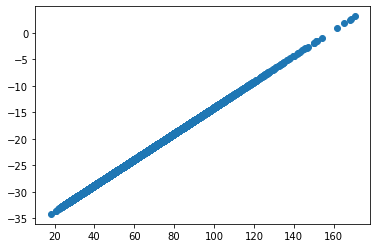

In [315]:
import matplotlib.pyplot as plt

plt.scatter(peso,residuals_original)

plt.show()

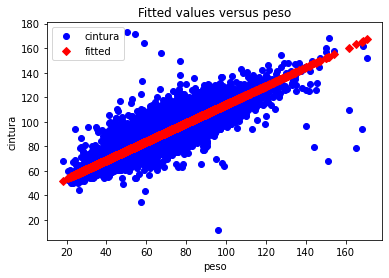

In [316]:
sm.graphics.plot_fit(results,1, vlines=False);

## Interpretación

R-squared 
Qué tan bien el modelo de regresión representa los datos observados | Varía entre 0 y 1
Es la proporción de la variación en la variable dependiente (Y) explicada por el modelo de regresión

R-squared adjusted
Ajusta de acuerdo a los predictores que no son relevantes en el modelo

t
El coeficiente, divido por su error estándar. Si el coeficiente es grande, comparado con su error estándar, es probablemente diferente de 0. Para ello, un valor inferior al 5%, indicaría que con 95% de probabilidad la variable tiene un efecto. 

Jarque-Bera
Prueba la hipótesis de normalidad de los residuos
(Asimetría^2 + 1/4*(Curtosis-3)^2)*n/6
Asimetría = 0 | Curtosis = 3





In [246]:
#Para generar predicciones
results.predict()

array([94.24656091, 65.49344017, 79.96445889, ..., 73.88134136,
       83.17604268, 99.00726158])

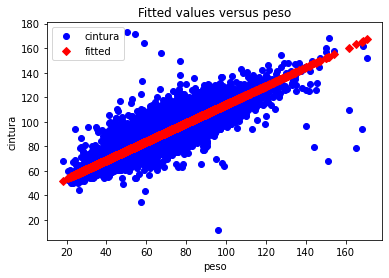

In [247]:
sm.graphics.plot_fit(results,1, vlines=False);

In [248]:
#Regresión lineal - Alternativa 1 para talla
y2 = cintura
x2 = talla

constant2 = sm.tools.tools.add_constant(x2,prepend=True,has_constant='skip')

results2 = sm.OLS(y2,constant2).fit()
 
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                cintura   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     1499.
Date:                Fri, 03 Sep 2021   Prob (F-statistic):          4.10e-315
Time:                        22:47:22   Log-Likelihood:                -74110.
No. Observations:               17985   AIC:                         1.482e+05
Df Residuals:                   17983   BIC:                         1.482e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.4178      1.631     14.971      0.0

In [249]:
results2.predict()

array([83.29241058, 82.76961669, 89.56593726, ..., 84.41842819,
       81.72402891, 85.00154445])

In [250]:
#Regresión lineal - Alternativa 2 para peso
pesoycintura = medidascompletas2[['peso','cintura']]

model_ols = sm.OLS.from_formula("cintura ~ peso", data=pesoycintura)

result = model_ols.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                cintura   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                 5.399e+04
Date:                Fri, 03 Sep 2021   Prob (F-statistic):               0.00
Time:                        22:47:24   Log-Likelihood:                -62358.
No. Observations:               17985   AIC:                         1.247e+05
Df Residuals:                   17983   BIC:                         1.247e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.5539      0.218    176.741      0.0

In [251]:
result.predict()

array([94.24656091, 65.49344017, 79.96445889, ..., 73.88134136,
       83.17604268, 99.00726158])

In [252]:
predict = result.predict()

residuals = medidascompletas2['cintura'] - predict

print(residuals)

0         4.453439
1        -1.493440
2       -12.364459
3        -3.193190
4         0.428520
           ...    
18635    -2.833461
18636    12.052806
18637    -2.531341
18638    16.773957
18639     9.142738
Name: cintura, Length: 17985, dtype: float64


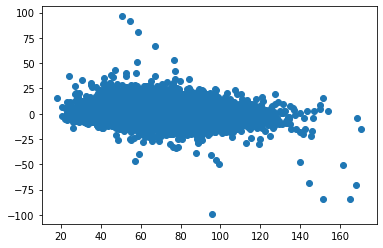

In [253]:
import matplotlib.pyplot as plt

plt.scatter(medidascompletas2['peso'],residuals)

plt.show()

In [254]:
medidas.head()

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,emb,temb,cintura,cadera,sistol,diastol,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.4,4,,98.7,106.0,63.25,53.25,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.1,,,64.0,75.0,70.00,50.00,15:25,3,15:25,1,M1041,1,1,1,417.946672,101
2,10287,6,1,AGUASCALIENTES,2,18,8,54.80,1,162.0,4,,67.6,94.3,70.50,41.00,9:40,1,9:40,1,M0108,5,3,1,472.980811,15
3,91526,4,9,DISTRITO FEDERAL,1,10,8,33.40,2,146.5,,,60.6,72.2,71.00,64.00,7:40,3,7:45,1,M0931,4,3,2,1832.581391,94
4,210939,3,21,PUEBLA,2,19,3,97.95,2,161.0,4,,113.0,127.0,72.00,53.50,6:00,2,6:00,1,M2123,5,3,1,7622.066564,215


In [255]:
hombres = medidascompletas2.loc[medidascompletas2['sexo']==1] 
mujeres = medidascompletas2.loc[medidascompletas2['sexo']==2]
#guardar los datos de las variables de interés
peso_mujeres = mujeres['peso']
talla_mujeres = mujeres['talla']
cintura_mujeres = mujeres['cintura']
#guardar los datos de las variables de interés
peso_hombres = hombres['peso']
talla_hombres = hombres['talla']
cintura_hombres = hombres['cintura']

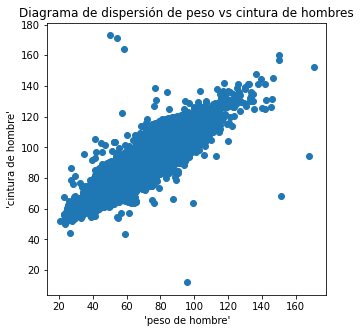

In [256]:
plt.figure(figsize=(5,5))
plt.scatter(x = peso_hombres, y = cintura_hombres)
plt.xlabel("'peso de hombre'")
plt.ylabel("'cintura de hombre'")
plt.title("Diagrama de dispersión de peso vs cintura de hombres")

plt.show()

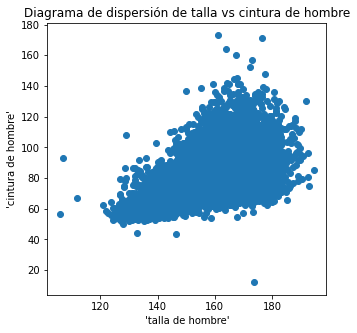

In [257]:
plt.figure(figsize=(5,5))
plt.scatter(x = talla_hombres, y = cintura_hombres)
plt.xlabel("'talla de hombre'")
plt.ylabel("'cintura de hombre'")
plt.title("Diagrama de dispersión de talla vs cintura de hombre")

plt.show()

In [281]:
#Regresión lineal - Alternativa 1 para peso
peso_hombres = hombres['peso']
cintura_hombres = hombres['cintura']

x = peso_hombres
y = cintura_hombres

#Agrega una constante = 1 que es el multiplicador del intercepto (True - al inicio)
constant = sm.tools.tools.add_constant(x,prepend=True,has_constant='skip')

results_hombres = sm.OLS(y,constant).fit()

print(results_hombres.summary())

# Palomita en R-Squared = 1
# 2 palomita p rango = [38.98 = cercano a 0.97]
# 3 palomita Kurtosis = 3 y Skew = 0

                            OLS Regression Results                            
Dep. Variable:                cintura   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                 3.094e+04
Date:                Fri, 03 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:09:37   Log-Likelihood:                -27681.
No. Observations:                8141   AIC:                         5.537e+04
Df Residuals:                    8139   BIC:                         5.538e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2461      0.296    125.984      0.0

In [299]:
results2.predict()

array([ 62.1458589 ,  61.02760518,  73.04883261, ...,  79.77699246,
       125.8490455 ,  72.09831696])

In [309]:
cintura_ecuacion = (0.7455 * peso_hombres) + 37.2461
peso2 = cintura_ecuacion - peso_hombres
print(peso2)

3        28.745800
5        29.127550
9        25.023738
17       29.229350
21       22.014275
           ...    
18626    17.560525
18627    19.787400
18630    22.726875
18634     6.998775
18637    25.348225
Name: peso, Length: 8141, dtype: float64


In [301]:
predict2 = results_hombres.predict()

residuals2 = peso_hombres - predict2

print(residuals2)

3       -28.745859
5       -29.127605
9       -25.023833
17      -29.229404
21      -22.014399
           ...    
18626   -17.560693
18627   -19.787546
18630   -22.726992
18634    -6.999045
18637   -25.348317
Name: peso, Length: 8141, dtype: float64


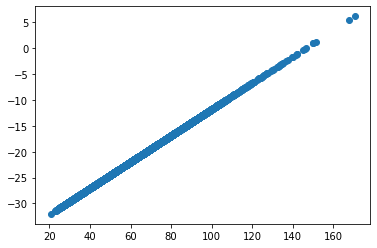

In [302]:
import matplotlib.pyplot as plt

plt.scatter(peso_hombres,residuals2)

plt.show()

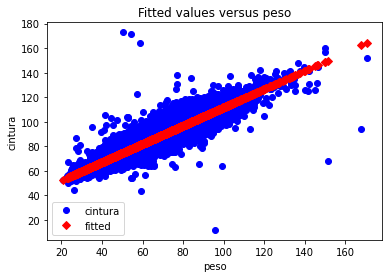

In [303]:
sm.graphics.plot_fit(results2,1, vlines=False);

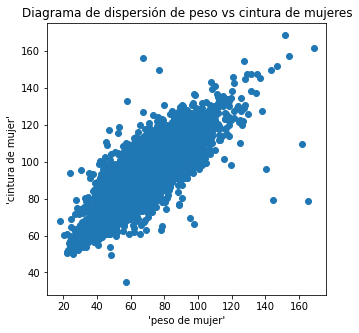

In [304]:
plt.figure(figsize=(5,5))
plt.scatter(x = peso_mujeres, y = cintura_mujeres)
plt.xlabel("'peso de mujer'")
plt.ylabel("'cintura de mujer'")
plt.title("Diagrama de dispersión de peso vs cintura de mujeres")

plt.show()

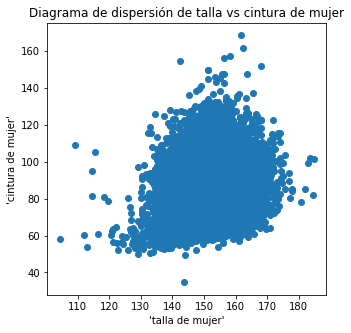

In [305]:
plt.figure(figsize=(5,5))
plt.scatter(x = talla_mujeres, y = cintura_mujeres)
plt.xlabel("'talla de mujer'")
plt.ylabel("'cintura de mujer'")
plt.title("Diagrama de dispersión de talla vs cintura de mujer")

plt.show()

In [306]:
#Regresión lineal - Alternativa 1 para peso
peso_mujeres = mujeres['peso']
cintura_mujeres = mujeres['cintura']

y = peso_mujeres
x = cintura_mujeres

#Agrega una constante = 1 que es el multiplicador del intercepto (True - al inicio)
constant1 = sm.tools.tools.add_constant(x,prepend=True,has_constant='skip')

results1 = sm.OLS(y,constant1).fit()

print(results1.summary())

# Palomita en R-Squared = 1
# 2 palomita p rango = [38.98 = cercano a 0.97]
# 3 palomita Kurtosis = 3 y Skew = 0

                            OLS Regression Results                            
Dep. Variable:                   peso   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                 2.806e+04
Date:                Fri, 03 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:40:19   Log-Likelihood:                -34908.
No. Observations:                9844   AIC:                         6.982e+04
Df Residuals:                    9842   BIC:                         6.983e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.9738      0.495    -38.361      0.0

In [307]:
results1.predict()

array([73.05360616, 40.69950564, 44.05612701, ..., 77.10952366,
       74.21909969, 81.86473728])

In [318]:
cintura_ecuacion1 = (0.9324 * peso_mujeres) - 18.9738
Peso1 = cintura_ecuacion1 - peso_mujeres
print(Peso1)

0       -23.95592
1       -21.38374
2       -22.67828
4       -25.59522
6       -21.13362
           ...   
18633   -24.07084
18635   -24.09788
18636   -23.66524
18638   -22.96558
18639   -24.38180
Name: peso, Length: 9844, dtype: float64


In [319]:
predict1 = results1.predict()

residuals1 = peso_mujeres - predict1

print(residuals1)

0         0.646394
1        -5.049506
2        10.743873
4        11.563148
6        -2.502460
           ...    
18633     6.635410
18635     8.061044
18636    -7.709524
18638   -15.169100
18639    -1.864737
Name: peso, Length: 9844, dtype: float64


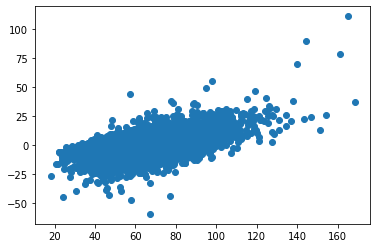

In [320]:
import matplotlib.pyplot as plt

plt.scatter(peso_mujeres,residuals1)

plt.show()

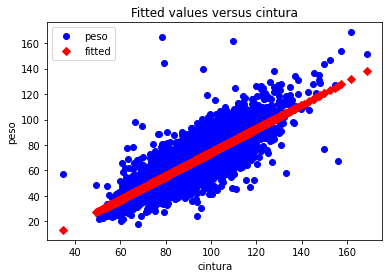

In [321]:
sm.graphics.plot_fit(results1,1, vlines=False);

In [322]:
predict = result.predict()

residuals = medidascompletas2['cintura'] - predict

print(residuals)

0         4.453439
1        -1.493440
2       -12.364459
3        -3.193190
4         0.428520
           ...    
18635    -2.833461
18636    12.052806
18637    -2.531341
18638    16.773957
18639     9.142738
Name: cintura, Length: 17985, dtype: float64


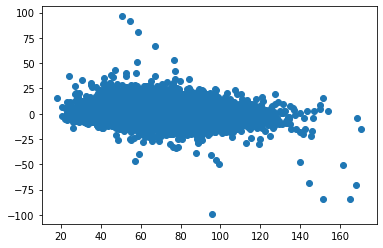

In [323]:
import matplotlib.pyplot as plt

plt.scatter(medidascompletas2['peso'],residuals)

plt.show()

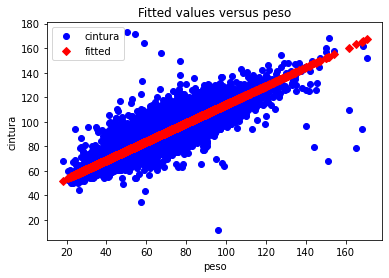

In [324]:
sm.graphics.plot_fit(results,1, vlines=False);